In [5]:
#! bash
#./wordle/Scripts/Activate.ps1
#./wordle/Scripts/python.exe -m pip install --upgrade pip
#python -m pip install -r requirements.txt
#pip freeze > requirements.txt

In [6]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np
import string


In [7]:

# collect stanford graph base of words
url = "https://raw.githubusercontent.com/dwyl/english-words/master/words_alpha.txt"
response = requests.get(url)
data = response.text
data[0:10]

'a\r\naa\r\naaa'

In [8]:
# split the string, and get just 5 letter words
words = data.split('\r\n')
n5_words = list(filter(lambda x: len(x) == 5, words))
n5_words[0:5]

['aahed', 'aalii', 'aargh', 'aaron', 'abaca']

In [9]:
df_words = pd.DataFrame([list(x) for x in n5_words], columns=['c1', 'c2', 'c3', 'c4', 'c5'], index=n5_words)
c1_count = df_words.c1.value_counts() #.plot(kind="bar")
c2_count = df_words.c2.value_counts() #.plot(kind="bar")
c3_count = df_words.c3.value_counts() #.plot(kind="bar")
c4_count = df_words.c4.value_counts() #.plot(kind="bar")
c5_count = df_words.c5.value_counts() #.plot(kind="bar")
c5_count.head()

s    3148
e    1873
y    1685
a    1282
t    1090
Name: c5, dtype: int64

In [17]:
df_counts = pd.concat([c1_count, c2_count, c3_count, c4_count, c5_count], axis = 1)
df_counts.head()

,c1,c2,c3,c4,c5
s,1813,173,682,721,3148
c,1196,254,531,542,221
a,1173,2871,1481,1585,1282
b,1141,108,446,297,97
t,981,316,783,1019,1090


In [18]:

# https://stackoverflow.com/questions/59066811/how-can-a-plot-a-5-grouped-bars-bar-chart-in-matplotlib
# Setting the positions and width for the bars
pos = list(range(len(df_counts)))
num_col = len(df_counts.columns)
width = 0.95 / num_col
fig, ax = plt.subplots(figsize=(16,10))

bar_colors = ['#feb24c', '#f03b20', '#ffeda0', '#43a2ca', '#a8ddb5']
bar_labels = df_words.columns[0:]

for i, (colname, color, lbl) in enumerate(zip(df_words.columns[0:], bar_colors, bar_labels)):
    delta_p = 0.125 + width*i
    plt.bar([p + delta_p for p in pos],
            df_counts[colname], width, color=color, label=lbl)
    for j in range(len(df_counts)):
        ax.annotate("°C" if i < 3 else "mm" if i == 3 else "%",
                    xy=(pos[j] + delta_p, df_counts[colname][j] + 1),
                    ha='center')

ax.set_ylabel('Amount')
ax.set_title('Temperatures, Rain and Humidity')
ax.set_xticks(pos)

def update_ticks(x, pos):
    return df['month'][pos]

ax.xaxis.set_major_formatter(ticker.NullFormatter())
ax.xaxis.set_minor_formatter(ticker.FuncFormatter(update_ticks))
ax.xaxis.set_minor_locator(ticker.FixedLocator([p+0.5 for p in pos]))
for tick in ax.xaxis.get_minor_ticks():
    tick.tick1line.set_markersize(0)
    tick.tick2line.set_markersize(0)
    tick.label1.set_horizontalalignment('center')
plt.xlim(min(pos), max(pos)+1)
plt.ylim([0, 10+max([max(df_counts[colname]) for colname in df_counts.columns[1:]])])
plt.legend()
plt.grid()
plt.show()


KeyError: 12

<Figure size 1152x720 with 1 Axes>

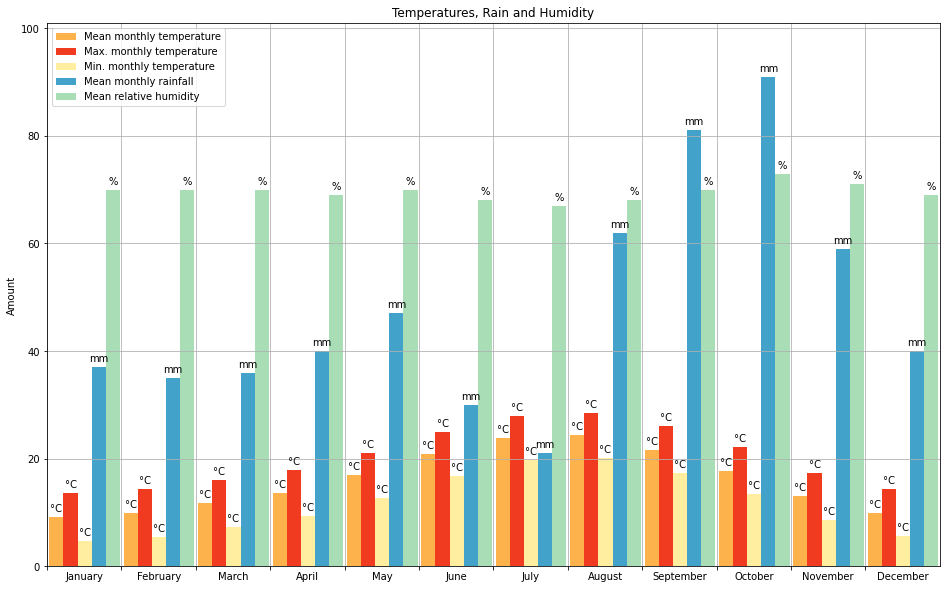

In [2]:
meteo = [["January", 9.2, 13.6, 4.7, 37, 70],
         ["February", 9.9, 14.3, 5.4, 35, 70],
         ["March", 11.8, 16.1, 7.4, 36, 70],
         ["April", 13.7, 18.0, 9.4, 40, 69],
         ["May", 16.9, 21.1, 12.8, 47, 70],
         ["June", 20.9, 24.9, 16.8, 30, 68],
         ["July", 23.9, 28.0, 19.8, 21, 67],
         ["August", 24.4, 28.5, 20.2, 62, 68],
         ["September", 21.7, 26.0, 17.4, 81, 70],
         ["October", 17.8, 22.1, 13.5, 91, 73],
         ["November", 13.0, 17.3, 8.6, 59, 71],
         ["December", 10.0, 14.3, 5.7, 40, 69]]
df = pd.DataFrame(meteo)
#df.rename(columns = {0:"mes", 1: "Temp. media mes", 2: "Temp. máxima media", 3: "Temp. mínima media", 4: "Media lluvias mensual", 5:"Humedad media rel"}, inplace = True)
df.rename(columns = {0:"month", 1: "Mean monthly temperature", 2: "Max. monthly temperature", 3: "Min. monthly temperature", 4: "Mean monthly rainfall", 5:"Mean relative humidity"}, inplace = True)

# Setting the positions and width for the bars
pos = list(range(len(df)))
num_col = len(df.columns) - 1
width = 0.95 / num_col

fig, ax = plt.subplots(figsize=(16,10))

bar_colors = ['#feb24c', '#f03b20', '#ffeda0', '#43a2ca', '#a8ddb5']
bar_labels = df.columns[1:]

for i, (colname, color, lbl) in enumerate(zip(df.columns[1:], bar_colors, bar_labels)):
    delta_p = 0.125 + width*i
    plt.bar([p + delta_p for p in pos],
            df[colname], width, color=color, label=lbl)
    for j in range(len(df)):
        ax.annotate("°C" if i < 3 else "mm" if i == 3 else "%",
                    xy=(pos[j] + delta_p, df[colname][j] + 1),
                    ha='center')

ax.set_ylabel('Amount')
ax.set_title('Temperatures, Rain and Humidity')
ax.set_xticks(pos)

def update_ticks(x, pos):
    return df['month'][pos]

ax.xaxis.set_major_formatter(ticker.NullFormatter())
ax.xaxis.set_minor_formatter(ticker.FuncFormatter(update_ticks))
ax.xaxis.set_minor_locator(ticker.FixedLocator([p+0.5 for p in pos]))
for tick in ax.xaxis.get_minor_ticks():
    tick.tick1line.set_markersize(0)
    tick.tick2line.set_markersize(0)
    tick.label1.set_horizontalalignment('center')
plt.xlim(min(pos), max(pos)+1)
plt.ylim([0, 10+max([max(df[colname]) for colname in df.columns[1:]])])
plt.legend()
plt.grid()
plt.show()

In [3]:
pos

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]